**Face detection**
Task is to predict the boundaries(mask) around the face in a given image.

Dataset
Faces in images marked with bounding boxes. Have around 500 images with around 1100 faces manually tagged via bounding box.

**Mount Google drive if you are using google colab**

In [0]:
import tensorflow as tf 
tf.test.gpu_device_name()


''

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Load the "images.npy" file (4 marks)**

In [0]:
import numpy as np
filepath = '/content/gdrive/My Drive/Colab Notebooks/Face Detection Project/'
file = filepath + 'images.npy'
data = np.load(file,allow_pickle=True)

In [0]:
print (data.shape)
print (data.size)
print (data.itemsize)
print(type(data))
print (data.dtype)

(409, 2)
818
8
<class 'numpy.ndarray'>
object


**Check one sample from the loaded "images.npy" file (4 marks)**

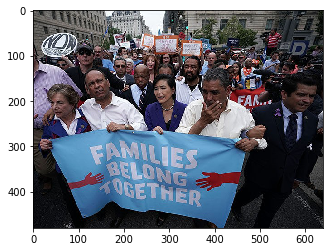

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
arr = data[220][0]
img = Image.fromarray(arr, mode="RGB")
plt.imshow(img)
plt.show()

**Set image dimensions (2 marks)**

Initialize image height, image width with value: 224

640 480
(224, 224)
(224, 224)


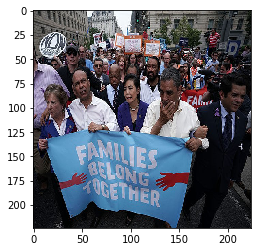

In [0]:
width, height = img.size
print (width, height)

new_size= 224, 224
print (new_size)
img = img.resize(new_size)
print(img.size)
plt.imshow(img)

In [0]:
''' Resize and Print all images
print(data.size)
for i in range(data.size):
  arr = data[i][0]
  img = Image.fromarray(arr, mode="RGB")
  width, height = img.size
  new_size= 224, 224
  img = img.resize(new_size)
  plt.imshow(img)
  plt.show()

'''


' Resize and Print all images\nprint(data.size)\nfor i in range(data.size):\n  arr = data[i][0]\n  img = Image.fromarray(arr, mode="RGB")\n  width, height = img.size\n  new_size= 224, 224\n  img = img.resize(new_size)\n  plt.imshow(img)\n  plt.show()\n\n'

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

Create features and labels

*   The label is the mask
*   Here feature is the image
*   Images will be stored in "X_train" array
*   Masks will be stored in "masks" array

In [0]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

**Print the shape of X_train and mask array (1 mark)**

In [0]:
print (X_train.shape)
print (masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


**Print a sample image and image array**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.1686275   0.1686275   0.09019613]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.25490201  0.25490201  0.17647064]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]]

 [[ 0.18431377  0.18431377  0.10588241]
  [ 0.22352946  0.22352946  0.14509809]
  [ 0.27058828  0.27058828  0.19215691]
  ...
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.14509809  0.12156868  0.06666672]
  [ 0.15294123  0.12941182  0.07450986]]

 [[ 0.17647064  0.17647064  0.10588241]
  [ 0.21568632  0.21568632  0.14509809]
  [ 0.27058828  0.27058828  0.20000005]
  ...
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.15294123  0.12941182  0.07450986]
  [ 0.14509809  0.12156868  0.06666672]]

 ...

 [[-0.00392157  0.00392163 -0.04313725]
  [-0.00392157  0.01176476 -0.04313725]
  [ 0.04313731  0.05098045  0.00392163]
  ...
  [-0.38039213 -0.38039213 -0.40392154]
  [-0.43529409 -0.4588235  -0.52941179]
  [-0.45098037 -0.49019605 -0.53725493]]

 [

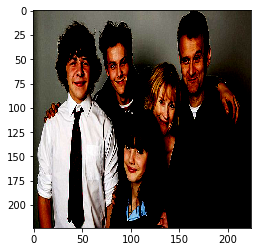

In [0]:
from matplotlib import pyplot
n = 6
print(X_train[n])

sample_image = X_train[n]
plt.imshow(sample_image)


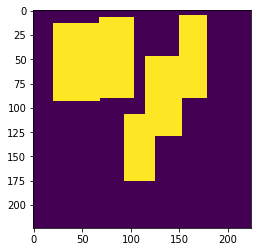

In [0]:
pyplot.imshow(masks[n])

Create the model (10 marks)

1.   Add MobileNet as model with below parameter values

*   input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
*   include_top: False
*   alpha: 1.0
*   weights: "imagenet"

2.   Add UNET architecture layers

*   This is the trickiest part of the project, you need to research and implement it correctly

In [0]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.models import Model
ALPHA = 1 

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,3), include_top=False, alpha=ALPHA, weights="imagenet")
    
    for layer in model.layers:
        layer.trainable = trainable

    block = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])

    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=model.input, outputs=x)


**Call the create_model function**

In [0]:
# Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)
model = create_model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

**Define dice coefficient function (5 marks)**
Create a function to calculate dice coefficient

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

**Define loss**

In [0]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

**Compile the model (5 marks)**
Complie the model using below parameters
loss: use the loss function defined above
optimizers: use Adam optimizer
metrics: use dice_coefficient function defined above

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile('Adam', loss=loss, metrics=[dice_coefficient])


**Define checkpoint and earlystopping**

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [0]:
print (X_train.shape)
print (masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


**Fit the model (5 marks)**
Fit the model using below parameters
epochs: you can decide
batch_size: 1
callbacks: checkpoint, reduce_lr, stop

In [21]:
model.fit(X_train, masks, batch_size=1, epochs=10, verbose=1, shuffle=True, callbacks=[checkpoint, reduce_lr, stop])
# model.fit(X_train, masks, batch_size=1, epochs=10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples
Epoch 1/10
409/409 [==============================] - 569s 1s/sample - loss: 1.2005 - dice_coefficient: 0.5132
Epoch 2/10
409/409 [==============================] - 566s 1s/sample - loss: 0.8754 - dice_coefficient: 0.5959
Epoch 3/10
409/409 [==============================] - 561s 1s/sample - loss: 0.7098 - dice_coefficient: 0.6484
Epoch 4/10
409/409 [==============================] - 558s 1s/sample - loss: 0.6002 - dice_coefficient: 0.6918
Epoch 5/10
409/409 [==============================] - 560s 1s/sample - loss: 0.5831 - dice_coefficient: 0.7015
Epoch 6/10
409/409 [==============================] - 557s 1s/sample - loss: 0.5739 - dice_coefficient: 0.7088
Epoch 7/10
409/409 [==============================] - 569s 1s/sample - loss: 0.4832 - dice_coefficient: 0.7464
Epoch 8/10
409/409 [==============================] - 556s 1s/sample - loss: 0.4202 - dice_coefficient: 0.77

In [22]:
# Save Model to further use it

from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Using TensorFlow backend.


Saved model to disk


In [0]:
model.load_weights('model.h5')

In [24]:
X_train[10].shape

(224, 224, 3)

In [25]:
img1=np.expand_dims(X_train[10], axis=0)
print(img1.shape)

(1, 224, 224, 3)


**Get the predicted mask for a sample image (5 marks)**

In [26]:
preds_train = model.predict(img1, verbose=1)
print(preds_train.shape)

1/1 [==============================] - 1s 624ms/sample
(1, 224, 224)


In [27]:
print(X_train.shape)
print(preds_train[0].shape)
mask1=np.stack([preds_train[0]]*3, axis=-1)
print(mask1.shape)

(409, 224, 224, 3)
(224, 224)
(224, 224, 3)


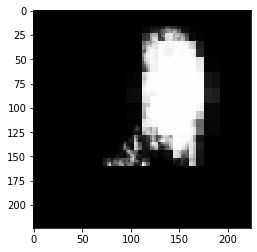

In [28]:
plt.imshow(mask1)

**Impose the mask on the image (5 marks)**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


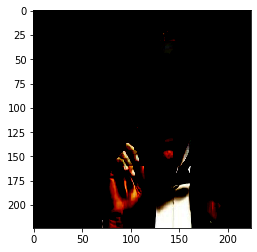

In [29]:
plt.imshow(X_train[10]-mask1)